In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import color, data, exposure, morphology
from skimage.color import label2rgb, rgb2gray
from skimage.filters import gaussian, threshold_local, threshold_otsu, try_all_threshold
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle, inpaint
from skimage.segmentation import slic
from skimage.transform import rotate, rescale
from skimage.util import random_noise

## Edges

- In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

- Grapefruits, Image preloaded as grapefruit. (Image skipped)

- The color module has already been preloaded for you.

### Instructions
-    Import the canny edge detector from the feature module.
-    Convert the image to grayscale, using the method from the color module used in previous chapters.
-    Apply the canny edge detector to the grapefruit image.

In [2]:
def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

grapefruit = plt.imread('./../../imgs/processing/toronjas.jpg')

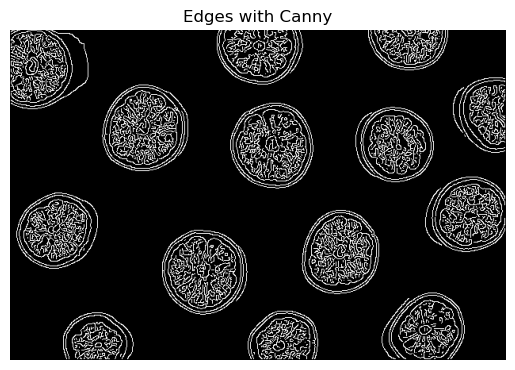

In [3]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

## Less edgy

- Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

- In this exercise, you'll experiment with sigma values of the canny() function. Image Skipped: Grapefruits, Image preloaded as grapefruit.

- The show_image has already been preloaded.

### Instructions 1/3
-    Apply the canny edge detector to the grapefruit image with a sigma of 1.8.

In [6]:
grapefruit = plt.imread('./../../imgs/processing/toronjas.jpg')
grapefruit = color.rgb2gray(grapefruit)

In [7]:
# Apply canny edge detector with a sigma of 1.8
canny_edges = canny(grapefruit, sigma=1.8)

### Instructions 2/3
-    Apply the canny edge detector to the grapefruit image with a sigma of 2.2.

In [8]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

### Instructions 3/3
-    Show the resulting images.

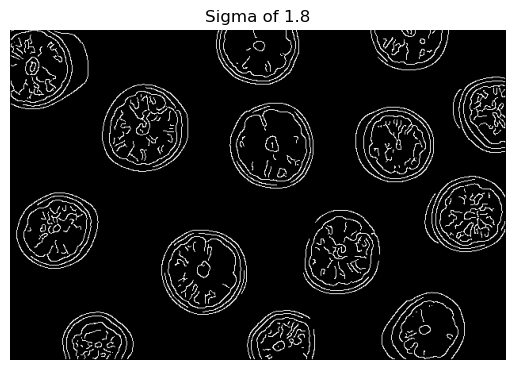

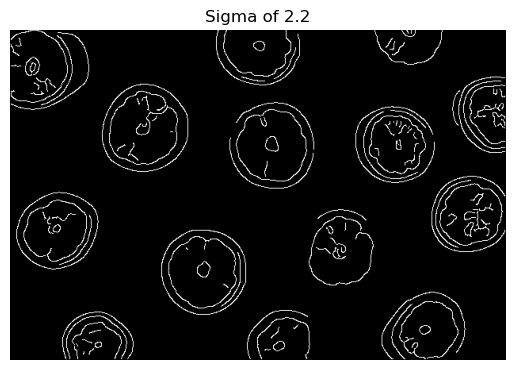

In [9]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

## Perspective

- In this exercise, you will detect the corners of a building using the Harris corner detector. The threshold_rel parameter will specify the minimum intensity of peaks.

- Building from a bottom perspective: Image preloaded as building_image. Image skipped

- The functions show_image() and show_image_with_corners() have already been preloaded for you. As well as the color module for converting images to grayscale.

### Instructions
-    Import the corner_harris() function from the feature module.
-    Convert the building_image to grayscale.
-    Apply the harris detector to obtain the measure response image with the possible corners.
-    Find the peaks of the corners.

In [10]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.figure(figsize=(12, 10))
    plt.imshow(image, cmap=cmap_type)  
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_image_with_corners(image, coords, title="Corners detected"):
    plt.figure(figsize=(12, 10))
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=35)
    plt.axis('off')
    plt.show()
    plt.close()

building_image = plt.imread('./../../imgs/processing/corners_building_top.jpg')

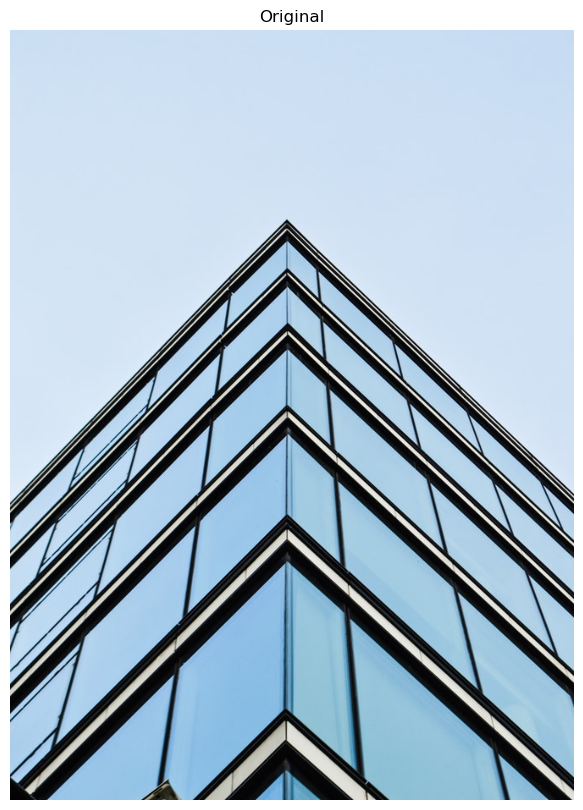

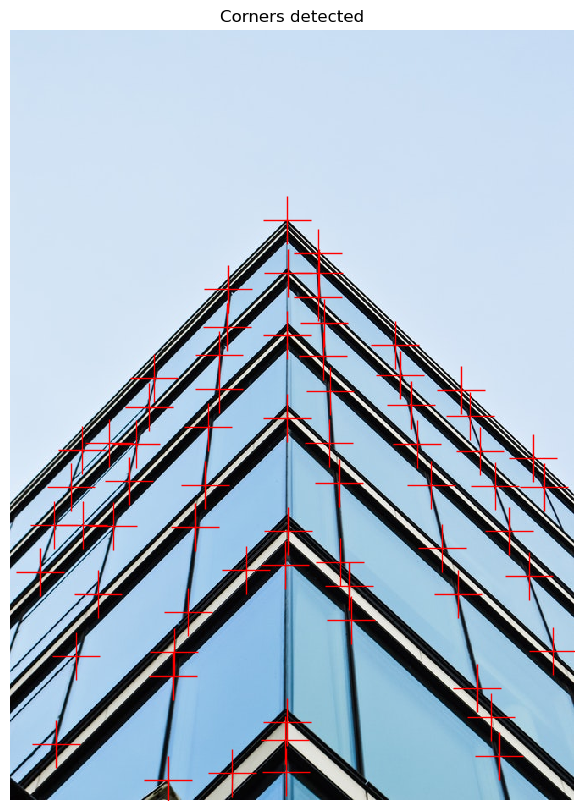

In [11]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

## Less corners

- In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the min_distance attribute parameter of the corner_peaks() function. The threshold_rel parameter will specify the minimum intensity of peaks.

- Building from a bottom perspective: Image preloaded as building_image.  Image Skipped

- The functions show_image(), show_image_with_corners() and required packages have already been preloaded for you. As well as all the previous code for finding the corners. The Harris measure response image obtained with corner_harris() is preloaded as measure_image.

### Instructions 1/3
-    Find the peaks of the corners with a minimum distance of 10 pixels.

In [12]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

With a min_distance set to 10, we detect a total 89 corners in the image.


### Instructions 2/3
-    Find the peaks of the corners with a minimum distance of 60 pixels.

In [14]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

With a min_distance set to 10, we detect a total 89 corners in the image.
With a min_distance set to 60, we detect a total 20 corners in the image.


### Instructions 3/3
-    Show original and resulting image with corners detected.

With a min_distance set to 10, we detect a total 89 corners in the image.
With a min_distance set to 60, we detect a total 20 corners in the image.


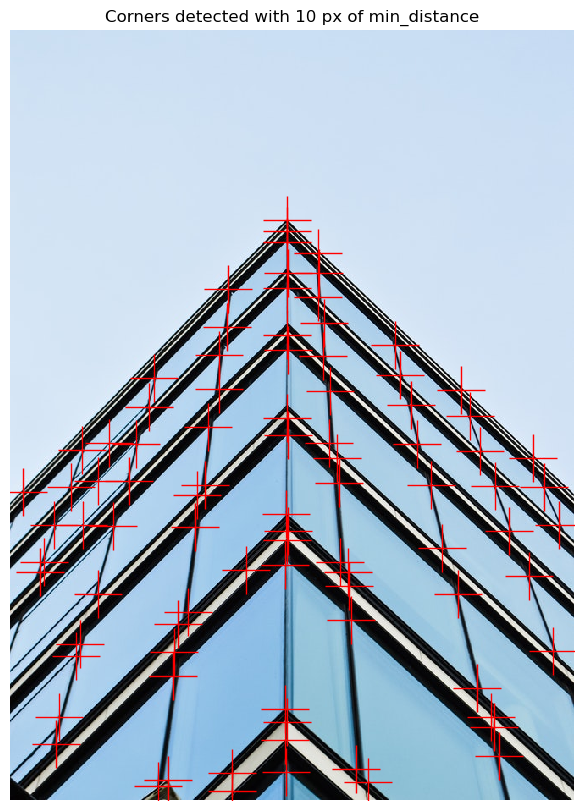

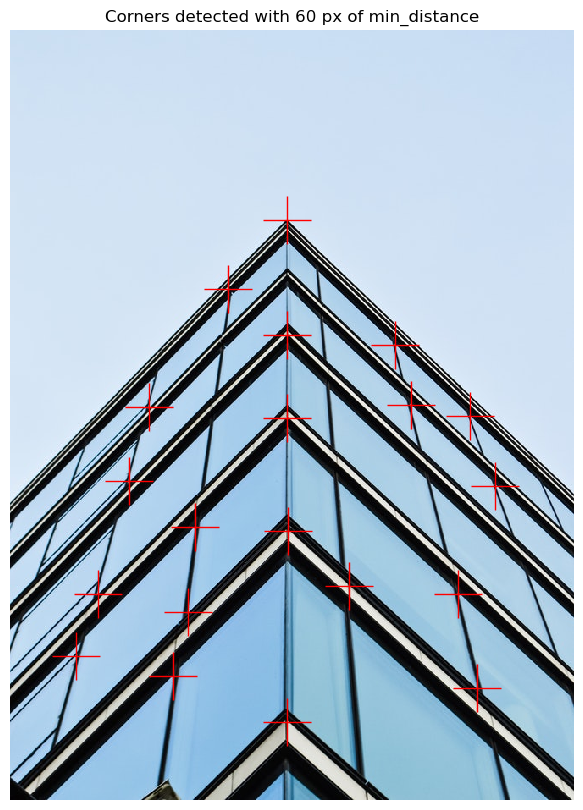

In [15]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10, "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

## Is someone there?

- In this exercise, you will check whether or not there is a person present in an image taken at night.

- LAndscape of starry night with a young man in the left bottom corner.  Image preloaded as night_image, image skipped.

- The Cascade of classifiers class from feature module has been already imported. The same is true for the show_detected_face() function, that is used to display the face marked in the image and crop so it can be shown separately.

### Instructions
-    Load the trained file from the data module.
-    Initialize the detector cascade with the trained file.
-    Detect the faces in the image, setting the minimum size of the searching window to 10 pixels and 200 pixels for the maximum.

In [24]:
from skimage.feature import Cascade
from matplotlib import patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

night_image = plt.imread('./../../imgs/processing/face_det3.jpg')

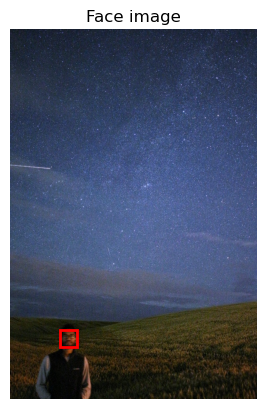

{'r': 773, 'c': 129, 'width': 43, 'height': 43}


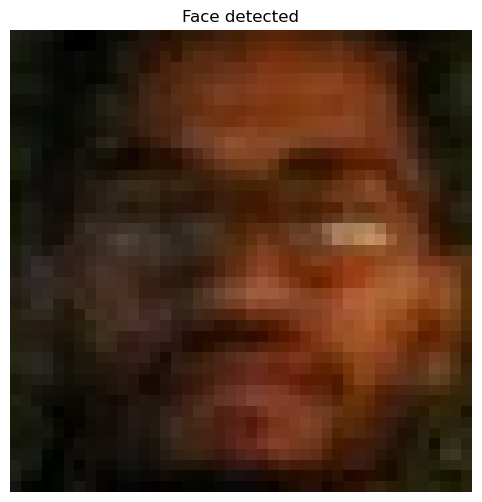

In [25]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

## Multiple faces

- In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!

- A group of 7 friends, Image preloaded as friends_image <b>image skipped</b>.

- The Cascade of classifiers class from feature module has already been imported, as well as the show_detected_face() function which is used to display the face marked in the image and crop it so it can be shown separately.

### Instructions
-    Load the trained file .lbp_frontal_face_cascade_filename(). from the data module.
-    Initialize the detector cascade with trained file.
-    Detect the faces in the image, setting a scale_factor of 1.2 and step_ratio of 1.

In [23]:
friends_image = plt.imread('./../../imgs/processing/face_det_friends22.jpg')

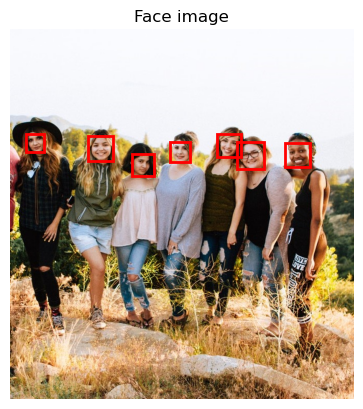

{'r': 202, 'c': 31, 'width': 35, 'height': 35}


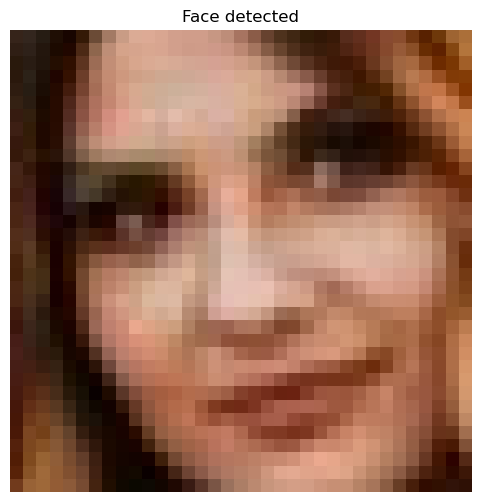

{'r': 217, 'c': 309, 'width': 39, 'height': 39}


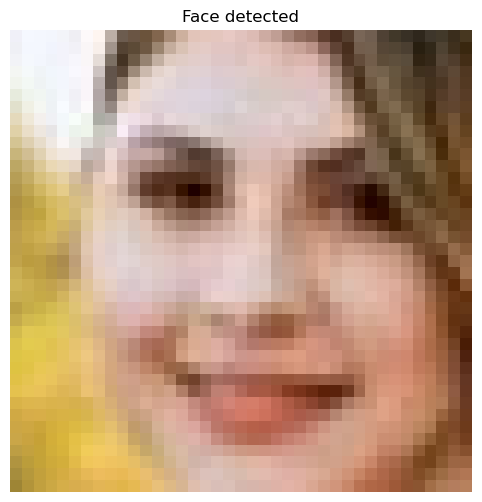

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


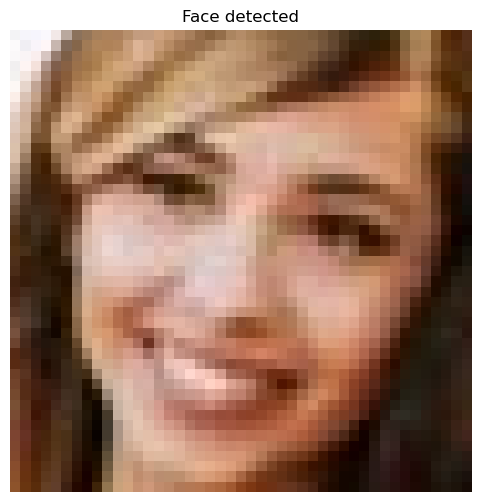

{'r': 206, 'c': 151, 'width': 49, 'height': 49}


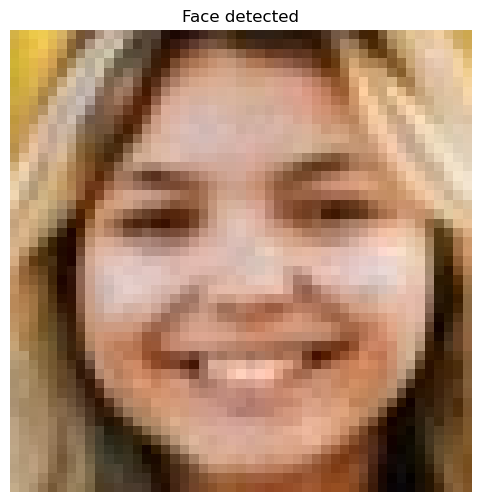

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


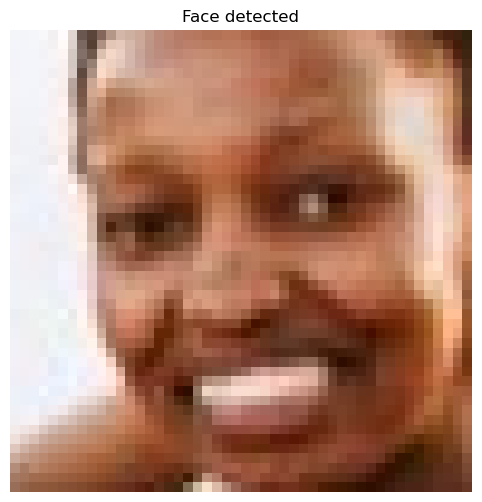

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


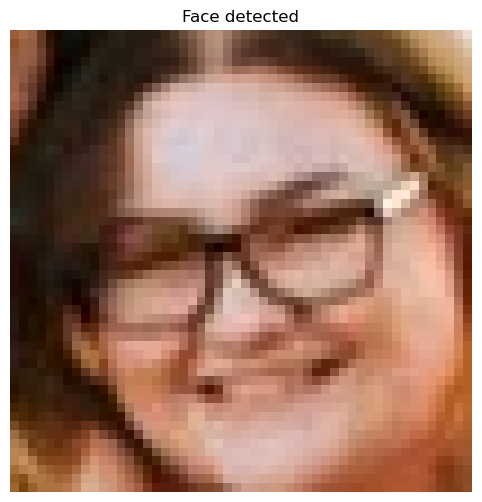

{'r': 241, 'c': 237, 'width': 42, 'height': 42}


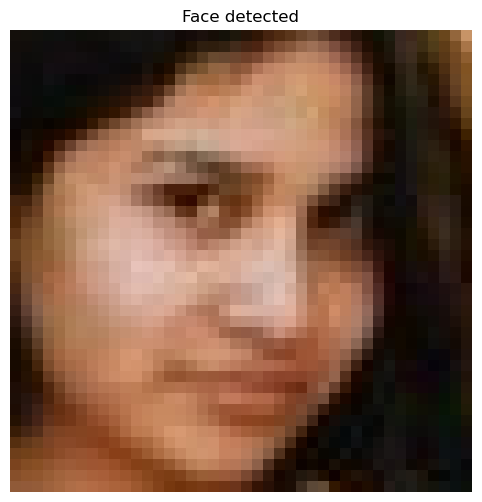

In [26]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

## Segmentation and face detection

- Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

- Using the slic() function for segmentation, pre-process the image before passing it to the face detector.  Young woman selfie <b>image skipped</b>, Image preloaded as profile_image.

- The Cascade class, the slic() function from segmentation module, and the show_detected_face() function for visualization have already been imported. The detector is already initialized and ready to use as detector.

## Instructions
-    Apply superpixel segmentation and obtain the segments a.k.a. labels using slic().
-    Obtain the segmented image using label2rgb(), passing the segments and profile_image.
-    Detect the faces, using the detector with multi scale method.

In [28]:
profile_image = plt.imread('./../../imgs/processing/face_det9.jpg')

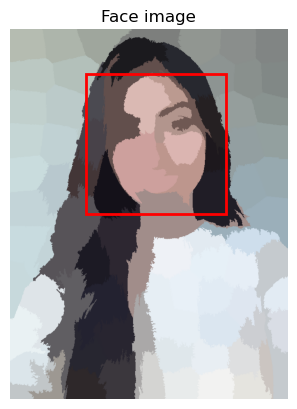

{'r': 105, 'c': 180, 'width': 334, 'height': 334}


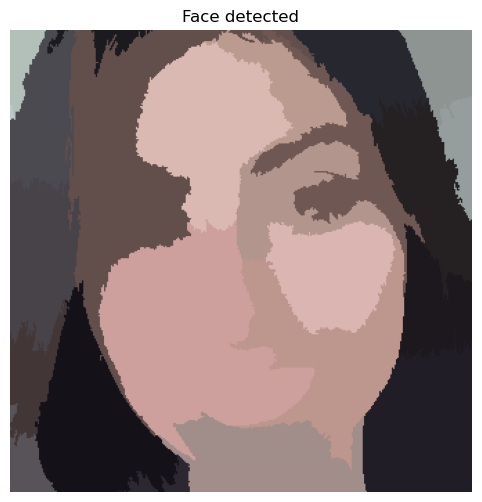

In [29]:
# Obtain the segmentation with default 100 regions
segments = slic(profile_image, 100)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

## Privacy protection

- Let's look at a real-world application of what you have learned in the course.

- In this exercise, you will detect human faces in the image and for the sake of privacy, you will anonymize data by blurring people's faces in the image automatically.

- Group band walking <b>image skipped</b>.  Image preloaded as group_image.

- You can use the gaussian filter for the blurriness.

- The face detector is ready to use as detector and all packages needed have been imported.

### Instructions
-    Detect the faces in the image using the detector, set the minimum size of the searching window to 10 by 10 pixels.
-    Go through each detected face with a for loop.
-    Apply a gaussian filter to detect and blur faces, using a sigma of 8.

In [33]:
from skimage.feature import Cascade
from skimage.filters import gaussian

def getFaceRectangle(d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= group_image[ x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] =  gaussian_image
    return original

group_image = plt.imread('./../../imgs/processing/face_det25.jpg')

In [35]:
# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10, 10), max_size=(100, 100))
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(d)
    
    # Apply gaussian filter to extracted face
#    blurred_face = gaussian(face, multichannel=True, sigma = 8)
    blurred_face = gaussian(face, sigma = 8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face) 
show_image(resulting_image, "Blurred faces")

ValueError: assignment destination is read-only

## Help Sally restore her graduation photo

- You are going to combine all the knowledge you acquired throughout the course to complete a final challenge: reconstructing a very damaged photo.

- Help Sally restore her favorite portrait which was damaged by noise, distortion, and missing information due to a breach in her laptop.
- Sally damaged picture
- Sally's damaged portrait is already loaded as damaged_image.

- You will be fixing the problems of this image by:

-    Rotating it to be uprightusing rotate()
-    Applying noise reduction with denoise_tv_chambolle()
-     Reconstructing the damaged parts with inpaint_biharmonic() from the inpaint module.

- show_image() is already preloaded.

## Instructions
-    Import the necessary module to apply restoration on the image.
-    Rotate the image by calling the function rotate().
-    Use the chambolle algorithm to remove the noise from the image.
-    With the mask provided, use the biharmonic method to restore the missing parts of the image and obtain the final image.

In [37]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

damaged_image = plt.imread('./../../imgs/processing/sally_damaged_image.jpg')

In [39]:
# Import the necessary modules
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

# Transform the image so it's not rotated
upright_img = rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
#upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1, multichannel=True)
upright_img_without_noise = denoise_tv_chambolle(upright_img,weight=0.1)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
#result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask, multichannel=True)
result = inpaint.inpaint_biharmonic(upright_img_without_noise, mask)

show_image(result)

ValueError: Input arrays have to be the same shape